##### import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Bio import SeqIO

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, precision_score,
    recall_score, f1_score, cohen_kappa_score,
    roc_auc_score, confusion_matrix,
    auc, roc_curve, classification_report, average_precision_score, precision_recall_curve
)

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE, SVMSMOTE, BorderlineSMOTE



# Other imports from your code


##### ignore ConvergenceWarning

In [2]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##### import helper library

In [3]:
import utility_amr

2024-03-31 13:03:36.438713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 13:03:36.438750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 13:03:36.439616: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 13:03:36.444401: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 13:03:37.077870: W tensorflow/compiler/tf2

##### Read Giessen_dataset

In [4]:
file_path_processed = "/home/abhishekh/Downloads/ML-iAMR-main/example_file/"
file_path_unprocessed = "/home/abhishekh/Downloads/ML-iAMR-main/Giessen_dataset/"

X_unprocessed= pd.read_csv(file_path_unprocessed+ "cip_ctx_ctz_gen_multi_data.csv")
y_unprocessed = pd.read_csv(file_path_unprocessed+ "cip_ctx_ctz_gen_pheno.csv")
X_unprocessed.set_index("prename", inplace=True)
y_unprocessed.set_index("prename", inplace=True)

data_gessin = pd.merge(X_unprocessed, y_unprocessed, left_index=True, right_index=True)
data_gessin

,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,X1425,...,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3,CIP,CTX,CTZ,GEN
prename,,,,,,,,,,,,,,,,,,,,,
H100_S2_L001,2,1,2,4,3,3,3,3,4,2,...,1,3,1,3,3,1,0,1,0,0
H105_S3_L001,2,1,2,4,3,3,3,3,4,2,...,1,3,1,3,3,1,1,1,0,0
H108_S5_L001,2,1,2,4,3,3,0,0,4,2,...,1,3,1,3,3,1,0,1,0,0
H109_S2_L001,2,1,2,4,3,3,3,3,4,2,...,1,3,1,3,3,1,0,1,0,0
H113_S6_L001,0,0,2,4,3,3,3,3,4,2,...,2,3,1,3,3,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wwRBK-17-0298-1_S42,0,0,2,4,3,3,0,0,4,0,...,2,3,1,3,3,1,1,1,1,0
wwRBK-17-075-1_S28,2,1,2,4,3,3,3,3,4,2,...,1,3,1,3,3,1,1,1,1,1
wwRBL-16-111-1_S16,2,0,0,0,3,0,3,3,4,0,...,0,3,0,0,0,0,1,1,1,0


In [5]:
col_unprocessed = X_unprocessed.columns.tolist()
unique_pos = [s for s in list(X_unprocessed.columns) if "." not in s]

##### Prepare preprocess data

In [6]:
X_processed = pd.read_csv(file_path_processed + "example_data.csv")
y_processed =  pd.read_csv(file_path_processed+ "example_pheno.csv")
modified_col_name = "X" + pd.Series(X_processed.columns.tolist()).astype(str)
X_processed.columns = modified_col_name
data_processed = pd.concat([X_processed, y_processed], axis = 1)
data_processed.set_index("prename", inplace=True)
y_processed.set_index("prename", inplace=True)

##### Prepare snp matrix

In [7]:
snp_matrix = data_gessin.iloc[:, :-4].loc[:, modified_col_name]
snp_matrix = snp_matrix.replace({1:"A", 2: "G", 3: "C", 4: "T", 0: np.nan })
modified_list_numeric = [s.lstrip("X") for s in snp_matrix.columns.tolist()]
modified_list_numeric = pd.Series(modified_list_numeric).astype(int)
snp_matrix.columns = modified_list_numeric

In [8]:
snp_matrix.head()

,393,588,747,759,774,966,1299,1302,1407,1425,...,4640785,4640908,4640924,4641031,4641131,4641208,4641217,4641296,4641439,4641440
prename,,,,,,,,,,,,,,,,,,,,,
H100_S2_L001,G,A,G,T,C,C,C,C,T,G,...,T,T,G,A,C,T,A,C,C,A
H105_S3_L001,G,A,G,T,C,C,C,C,T,G,...,T,T,G,A,C,T,A,C,C,A
H108_S5_L001,G,A,G,T,C,C,NaN,NaN,T,G,...,T,T,G,A,C,T,A,C,C,A
H109_S2_L001,G,A,G,T,C,C,C,C,T,G,...,T,T,G,A,C,A,A,C,C,A
H113_S6_L001,NaN,NaN,G,T,C,C,C,C,T,G,...,T,NaN,NaN,G,C,T,A,C,C,A


##### read fasta file

In [9]:
from Bio import SeqIO

file_path_ecoli ='/home/abhishekh/Downloads/GCF_000005845.2_ASM584v2_genomic.fna'
with open(file_path_ecoli, 'r') as fasta_file:
    for record in SeqIO.parse(fasta_file, 'fasta'):
        print(record.id, len(record.seq))

NC_000913.3 4641652


In [10]:
import kaos
ecoli_fasta = kaos.Read().read_fasta_removing_non_atgc(file_path_ecoli)

##### Read ag embedded snp matrix

In [11]:
X_oligo = pd.read_csv("/home/abhishekh/Downloads/ag_embedding.csv")
X_oligo.drop("Unnamed: 0", axis = 1, inplace=True)

##### oligo embedding for drug CIP

In [12]:
_, y_cip_oligo_rf, y_cv_true_cip = utility_amr.return_result_for_a_drug(drug = "CIP", X_log = X_oligo, data_gessin=data_gessin, type_embedding="oligo_embedding")


 The result of drug is:  CIP
Result of val set for fold:  0
f1_score:  0.9285714285714286  | mcc_score:  0.8768927051588633  |  precision_score:  0.9701492537313433  | recall_score:  0.8904109589041096
Result of val set for fold:  1
f1_score:  0.8951048951048951  | mcc_score:  0.8128702228234083  |  precision_score:  0.9142857142857143  | recall_score:  0.8767123287671232
Result of val set for fold:  2
f1_score:  0.9251700680272109  | mcc_score:  0.8630953542877668  |  precision_score:  0.918918918918919  | recall_score:  0.9315068493150684
Result of val set for fold:  3
f1_score:  0.8794326241134752  | mcc_score:  0.7899870205379181  |  precision_score:  0.9253731343283582  | recall_score:  0.8378378378378378
Result of val set for fold:  4
f1_score:  0.9285714285714286  | mcc_score:  0.8763202956220761  |  precision_score:  0.9701492537313433  | recall_score:  0.8904109589041096

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  

##### oligo embedding for drug CTX

In [13]:
_, y_ctx_oligo_rf, y_cv_true_ctx = utility_amr.return_result_for_a_drug(drug = "CTX", X_log = X_oligo, data_gessin=data_gessin, type_embedding="oligo_embedding")


 The result of drug is:  CTX
Result of val set for fold:  0
f1_score:  0.7801418439716312  | mcc_score:  0.611312248197788  |  precision_score:  0.7971014492753623  | recall_score:  0.7638888888888888
Result of val set for fold:  1
f1_score:  0.7361111111111112  | mcc_score:  0.525  |  precision_score:  0.7361111111111112  | recall_score:  0.7361111111111112
Result of val set for fold:  2
f1_score:  0.7612903225806451  | mcc_score:  0.5495225096043312  |  precision_score:  0.7108433734939759  | recall_score:  0.8194444444444444
Result of val set for fold:  3
f1_score:  0.7297297297297297  | mcc_score:  0.504546891013659  |  precision_score:  0.7012987012987013  | recall_score:  0.7605633802816901
Result of val set for fold:  4
f1_score:  0.7368421052631579  | mcc_score:  0.5073939138590167  |  precision_score:  0.691358024691358  | recall_score:  0.7887323943661971

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.7273425319741

##### oligo embedding for drug CTZ

In [14]:
_, y_ctz_oligo_rf, y_cv_true_ctz = utility_amr.return_result_for_a_drug(drug = "CTZ", X_log = X_oligo, data_gessin=data_gessin, type_embedding="oligo_embedding")


 The result of drug is:  CTZ
Result of val set for fold:  0
f1_score:  0.7387387387387387  | mcc_score:  0.6026618985537616  |  precision_score:  0.7321428571428571  | recall_score:  0.7454545454545455
Result of val set for fold:  1
f1_score:  0.7207207207207207  | mcc_score:  0.5752527948014569  |  precision_score:  0.7142857142857143  | recall_score:  0.7272727272727273
Result of val set for fold:  2
f1_score:  0.7962962962962963  | mcc_score:  0.6947648301697776  |  precision_score:  0.8113207547169812  | recall_score:  0.7818181818181819
Result of val set for fold:  3
f1_score:  0.7522935779816514  | mcc_score:  0.6273949549001253  |  precision_score:  0.7735849056603774  | recall_score:  0.7321428571428571
Result of val set for fold:  4
f1_score:  0.6788990825688074  | mcc_score:  0.5146502362451545  |  precision_score:  0.6851851851851852  | recall_score:  0.6727272727272727

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is: 

##### oligo embedding for drug GEN

In [15]:
_, y_gen_oligo_rf, y_cv_true_gen = utility_amr.return_result_for_a_drug(drug = "GEN", X_log = X_oligo, data_gessin=data_gessin, type_embedding="oligo_embedding")


 The result of drug is:  GEN
Result of val set for fold:  0
f1_score:  0.5476190476190477  | mcc_score:  0.3974149033383181  |  precision_score:  0.48936170212765956  | recall_score:  0.6216216216216216
Result of val set for fold:  1
f1_score:  0.5882352941176471  | mcc_score:  0.44662498710911586  |  precision_score:  0.46875  | recall_score:  0.7894736842105263
Result of val set for fold:  2
f1_score:  0.5714285714285714  | mcc_score:  0.42128293112534915  |  precision_score:  0.49056603773584906  | recall_score:  0.6842105263157895
Result of val set for fold:  3
f1_score:  0.5544554455445545  | mcc_score:  0.3951199458008754  |  precision_score:  0.4444444444444444  | recall_score:  0.7368421052631579
Result of val set for fold:  4
f1_score:  0.5287356321839081  | mcc_score:  0.36721230288455087  |  precision_score:  0.46  | recall_score:  0.6216216216216216

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.47062443686159067

##### prepare label encoding X

In [16]:
X_label_encoding = data_gessin.iloc[:, :-4].loc[:, modified_col_name]

##### label embedding for drug CIP with rf

In [17]:
_, y_cip_label_rf, y_cv_true_cip= utility_amr.return_result_for_a_drug(drug = "CIP", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "rf")


 The result of drug is:  CIP
Result of val set for fold:  0
f1_score:  0.9154929577464789  | mcc_score:  0.8507209853497381  |  precision_score:  0.9420289855072463  | recall_score:  0.8904109589041096
Result of val set for fold:  1
f1_score:  0.8767123287671232  | mcc_score:  0.7755887332615053  |  precision_score:  0.8767123287671232  | recall_score:  0.8767123287671232
Result of val set for fold:  2
f1_score:  0.9324324324324325  | mcc_score:  0.8759043439789425  |  precision_score:  0.92  | recall_score:  0.9452054794520548
Result of val set for fold:  3
f1_score:  0.9  | mcc_score:  0.8285335326127949  |  precision_score:  0.9545454545454546  | recall_score:  0.8513513513513513
Result of val set for fold:  4
f1_score:  0.9090909090909091  | mcc_score:  0.8371186023279167  |  precision_score:  0.9285714285714286  | recall_score:  0.8904109589041096

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.9243716394782506 0.0265721

##### label embedding for drug CTX with rf

In [18]:
_, y_ctx_label_rf, y_cv_true_ctx = utility_amr.return_result_for_a_drug(drug = "CTX", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "rf")


 The result of drug is:  CTX
Result of val set for fold:  0
f1_score:  0.75  | mcc_score:  0.55  |  precision_score:  0.75  | recall_score:  0.75
Result of val set for fold:  1
f1_score:  0.7338129496402878  | mcc_score:  0.535327021211006  |  precision_score:  0.7611940298507462  | recall_score:  0.7083333333333334
Result of val set for fold:  2
f1_score:  0.738255033557047  | mcc_score:  0.5168586432893013  |  precision_score:  0.7142857142857143  | recall_score:  0.7638888888888888
Result of val set for fold:  3
f1_score:  0.7323943661971831  | mcc_score:  0.5236031574059743  |  precision_score:  0.7323943661971831  | recall_score:  0.7323943661971831
Result of val set for fold:  4
f1_score:  0.7194244604316546  | mcc_score:  0.5068496796912647  |  precision_score:  0.7352941176470589  | recall_score:  0.704225352112676

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.7386336455961404 0.016006672131256908
The mean and std o

##### label embedding for drug CTZ with rf

In [19]:
_, y_ctz_label_rf, y_cv_true_ctz = utility_amr.return_result_for_a_drug(drug = "CTZ", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "rf")


 The result of drug is:  CTZ
Result of val set for fold:  0
f1_score:  0.6972477064220184  | mcc_score:  0.5438307748185662  |  precision_score:  0.7037037037037037  | recall_score:  0.6909090909090909
Result of val set for fold:  1
f1_score:  0.7321428571428571  | mcc_score:  0.5909224025825965  |  precision_score:  0.7192982456140351  | recall_score:  0.7454545454545455
Result of val set for fold:  2
f1_score:  0.7719298245614035  | mcc_score:  0.6493061834980676  |  precision_score:  0.7457627118644068  | recall_score:  0.8
Result of val set for fold:  3
f1_score:  0.6788990825688074  | mcc_score:  0.5167384685704353  |  precision_score:  0.6981132075471698  | recall_score:  0.6607142857142857
Result of val set for fold:  4
f1_score:  0.6972477064220184  | mcc_score:  0.5423900045864567  |  precision_score:  0.7037037037037037  | recall_score:  0.6909090909090909

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.714116314486

##### label embedding for drug GEN with rf

In [20]:
_, y_gen_label_rf, y_cv_true_gen = utility_amr.return_result_for_a_drug(drug = "GEN", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "rf")


 The result of drug is:  GEN
Result of val set for fold:  0
f1_score:  0.4375  | mcc_score:  0.3090700961340717  |  precision_score:  0.5185185185185185  | recall_score:  0.3783783783783784
Result of val set for fold:  1
f1_score:  0.47058823529411764  | mcc_score:  0.3361370486124895  |  precision_score:  0.5333333333333333  | recall_score:  0.42105263157894735
Result of val set for fold:  2
f1_score:  0.5432098765432098  | mcc_score:  0.3930492388881225  |  precision_score:  0.5116279069767442  | recall_score:  0.5789473684210527
Result of val set for fold:  3
f1_score:  0.6190476190476191  | mcc_score:  0.4913943425861493  |  precision_score:  0.5652173913043478  | recall_score:  0.6842105263157895
Result of val set for fold:  4
f1_score:  0.43478260869565216  | mcc_score:  0.2828632350512384  |  precision_score:  0.46875  | recall_score:  0.40540540540540543

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.5194894300265888

##### label embedding for drug CIP with svm

In [21]:
_, y_cip_label_svm, y_cv_true_cip = utility_amr.return_result_for_a_drug(drug = "CIP", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "svm")


 The result of drug is:  CIP
Result of val set for fold:  0
f1_score:  0.8652482269503546  | mcc_score:  0.7631566762438448  |  precision_score:  0.8970588235294118  | recall_score:  0.8356164383561644
Result of val set for fold:  1
f1_score:  0.8533333333333334  | mcc_score:  0.7279607652967306  |  precision_score:  0.8311688311688312  | recall_score:  0.8767123287671232
Result of val set for fold:  2
f1_score:  0.8553459119496856  | mcc_score:  0.7270806741821779  |  precision_score:  0.7906976744186046  | recall_score:  0.9315068493150684
Result of val set for fold:  3
f1_score:  0.8843537414965986  | mcc_score:  0.7883778013515619  |  precision_score:  0.8904109589041096  | recall_score:  0.8783783783783784
Result of val set for fold:  4
f1_score:  0.8783783783783784  | mcc_score:  0.7752074221436962  |  precision_score:  0.8666666666666667  | recall_score:  0.8904109589041096

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is: 

##### label embedding for drug CTX with svm

In [22]:
_, y_ctx_label_svm, y_cv_true_ctx = utility_amr.return_result_for_a_drug(drug = "CTX", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "svm")


 The result of drug is:  CTX
Result of val set for fold:  0
f1_score:  0.7051282051282052  | mcc_score:  0.43923322298731476  |  precision_score:  0.6547619047619048  | recall_score:  0.7638888888888888
Result of val set for fold:  1
f1_score:  0.7248322147651006  | mcc_score:  0.49198309361227605  |  precision_score:  0.7012987012987013  | recall_score:  0.75
Result of val set for fold:  2
f1_score:  0.5769230769230769  | mcc_score:  0.19061064393789132  |  precision_score:  0.5357142857142857  | recall_score:  0.625
Result of val set for fold:  3
f1_score:  0.6216216216216216  | mcc_score:  0.30525010017132376  |  precision_score:  0.5974025974025974  | recall_score:  0.647887323943662
Result of val set for fold:  4
f1_score:  0.684931506849315  | mcc_score:  0.4244594629274035  |  precision_score:  0.6666666666666666  | recall_score:  0.704225352112676

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.631168831168831 0.05828

##### label embedding for drug CTZ with svm

In [23]:
_, y_ctz_label_svm, y_cv_true_ctz = utility_amr.return_result_for_a_drug(drug = "CTZ", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "svm")


 The result of drug is:  CTZ
Result of val set for fold:  0
f1_score:  0.6065573770491803  | mcc_score:  0.37726932525664475  |  precision_score:  0.5522388059701493  | recall_score:  0.6727272727272727
Result of val set for fold:  1
f1_score:  0.6166666666666667  | mcc_score:  0.39711847249246296  |  precision_score:  0.5692307692307692  | recall_score:  0.6727272727272727
Result of val set for fold:  2
f1_score:  0.6896551724137931  | mcc_score:  0.5189806715710719  |  precision_score:  0.6557377049180327  | recall_score:  0.7272727272727273
Result of val set for fold:  3
f1_score:  0.6608695652173913  | mcc_score:  0.47485165596442325  |  precision_score:  0.6440677966101694  | recall_score:  0.6785714285714286
Result of val set for fold:  4
f1_score:  0.6428571428571429  | mcc_score:  0.4526437203749521  |  precision_score:  0.631578947368421  | recall_score:  0.6545454545454545

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is

##### label embedding for drug GEN with svm

In [24]:
_, y_gen_label_svm, y_cv_true_gen = utility_amr.return_result_for_a_drug(drug = "GEN", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "svm")


 The result of drug is:  GEN
Result of val set for fold:  0
f1_score:  0.35443037974683544  | mcc_score:  0.1478860043082856  |  precision_score:  0.3333333333333333  | recall_score:  0.3783783783783784
Result of val set for fold:  1
f1_score:  0.5  | mcc_score:  0.31933318682925255  |  precision_score:  0.42592592592592593  | recall_score:  0.6052631578947368
Result of val set for fold:  2
f1_score:  0.46  | mcc_score:  0.2534673833892497  |  precision_score:  0.3709677419354839  | recall_score:  0.6052631578947368
Result of val set for fold:  3
f1_score:  0.5581395348837209  | mcc_score:  0.4064751572184906  |  precision_score:  0.5  | recall_score:  0.631578947368421
Result of val set for fold:  4
f1_score:  0.47368421052631576  | mcc_score:  0.31141467184195337  |  precision_score:  0.46153846153846156  | recall_score:  0.4864864864864865

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.41835309254664094 0.0601036975672521

##### label embedding for drug CIP with lr

In [25]:
_, y_cip_label_lr, y_cv_true_cip = utility_amr.return_result_for_a_drug(drug = "CIP", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "lr")


 The result of drug is:  CIP
Result of val set for fold:  0
f1_score:  0.8888888888888888  | mcc_score:  0.8002809091139558  |  precision_score:  0.9014084507042254  | recall_score:  0.8767123287671232
Result of val set for fold:  1
f1_score:  0.8707482993197279  | mcc_score:  0.7634719503728269  |  precision_score:  0.8648648648648649  | recall_score:  0.8767123287671232
Result of val set for fold:  2
f1_score:  0.8734177215189873  | mcc_score:  0.7626182611798276  |  precision_score:  0.8117647058823529  | recall_score:  0.9452054794520548
Result of val set for fold:  3
f1_score:  0.8993288590604027  | mcc_score:  0.8136845343208056  |  precision_score:  0.8933333333333333  | recall_score:  0.9054054054054054
Result of val set for fold:  4
f1_score:  0.87248322147651  | mcc_score:  0.7632752552745797  |  precision_score:  0.8552631578947368  | recall_score:  0.8904109589041096

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0

##### label embedding for drug CTX with lr

In [26]:
_, y_ctx_label_lr, y_cv_true_ctx = utility_amr.return_result_for_a_drug(drug = "CTX", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "lr")


 The result of drug is:  CTX
Result of val set for fold:  0
f1_score:  0.7310344827586207  | mcc_score:  0.5132161296684716  |  precision_score:  0.726027397260274  | recall_score:  0.7361111111111112
Result of val set for fold:  1
f1_score:  0.7552447552447552  | mcc_score:  0.5619355411355209  |  precision_score:  0.7605633802816901  | recall_score:  0.75
Result of val set for fold:  2
f1_score:  0.6438356164383562  | mcc_score:  0.35190993445141894  |  precision_score:  0.6351351351351351  | recall_score:  0.6527777777777778
Result of val set for fold:  3
f1_score:  0.6621621621621622  | mcc_score:  0.3799863967371995  |  precision_score:  0.6363636363636364  | recall_score:  0.6901408450704225
Result of val set for fold:  4
f1_score:  0.7432432432432432  | mcc_score:  0.5269967864578309  |  precision_score:  0.7142857142857143  | recall_score:  0.7746478873239436

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.69447505266

##### label embedding for drug CTZ with lr

In [27]:
_, y_ctz_label_lr, y_cv_true_ctz = utility_amr.return_result_for_a_drug(drug = "CTZ", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "lr")


 The result of drug is:  CTZ
Result of val set for fold:  0
f1_score:  0.6608695652173913  | mcc_score:  0.4758929361327005  |  precision_score:  0.6333333333333333  | recall_score:  0.6909090909090909
Result of val set for fold:  1
f1_score:  0.6779661016949152  | mcc_score:  0.4976525237592981  |  precision_score:  0.6349206349206349  | recall_score:  0.7272727272727273
Result of val set for fold:  2
f1_score:  0.7413793103448276  | mcc_score:  0.5996925456138049  |  precision_score:  0.7049180327868853  | recall_score:  0.7818181818181819
Result of val set for fold:  3
f1_score:  0.6909090909090909  | mcc_score:  0.5323117462054054  |  precision_score:  0.7037037037037037  | recall_score:  0.6785714285714286
Result of val set for fold:  4
f1_score:  0.625  | mcc_score:  0.4252571593150621  |  precision_score:  0.6140350877192983  | recall_score:  0.6363636363636364

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.6581821584

##### label embedding for drug GEN with lr

In [28]:
_, y_gen_label_lr, y_cv_true_gen = utility_amr.return_result_for_a_drug(drug = "GEN", X_log = X_label_encoding, data_gessin=data_gessin, type_embedding="label_embedding", type_classifier = "lr")


 The result of drug is:  GEN
Result of val set for fold:  0
f1_score:  0.35135135135135137  | mcc_score:  0.15935135135135134  |  precision_score:  0.35135135135135137  | recall_score:  0.35135135135135137
Result of val set for fold:  1
f1_score:  0.5714285714285714  | mcc_score:  0.42128293112534915  |  precision_score:  0.49056603773584906  | recall_score:  0.6842105263157895
Result of val set for fold:  2
f1_score:  0.4946236559139785  | mcc_score:  0.3106757996597987  |  precision_score:  0.41818181818181815  | recall_score:  0.6052631578947368
Result of val set for fold:  3
f1_score:  0.5977011494252874  | mcc_score:  0.4600742847550276  |  precision_score:  0.5306122448979592  | recall_score:  0.6842105263157895
Result of val set for fold:  4
f1_score:  0.48  | mcc_score:  0.3221905249877032  |  precision_score:  0.47368421052631576  | recall_score:  0.4864864864864865

 The result of mean of cross validation set across the five fold is: 
The mean and std of precision is:  0.452

##### ROC AUC graph plot

In [29]:
def plot_roc_drug_multi_model(drug, y_cv_true, y_pred_label_encode_rf, y_pred_label_encode_svm, y_pred_label_encode_lr, y_pred_oligo_encode, ax):

    fpr_label_encode_rf, tpr_label_encode_rf, thresholds_label_encode_rf = roc_curve(y_cv_true, y_pred_label_encode_rf)
    fpr_label_encode_svm, tpr_label_encode_svm, thresholds_label_encode_svm = roc_curve(y_cv_true, y_pred_label_encode_svm)
    fpr_label_encode_lr, tpr_label_encode_lr, thresholds_label_encode_lr = roc_curve(y_cv_true, y_pred_label_encode_lr)


    fpr_oligo, tpr_oligo, thresholds_oligo = roc_curve(y_cv_true, y_pred_oligo_encode)

    roc_auc_label_encode_rf = auc(fpr_label_encode_rf, tpr_label_encode_rf)
    roc_auc_label_encode_svm = auc(fpr_label_encode_svm, tpr_label_encode_svm)
    roc_auc_label_encode_lr = auc(fpr_label_encode_lr, tpr_label_encode_lr)
    roc_auc_oligo = auc(fpr_oligo, tpr_oligo)

    ax.plot(fpr_label_encode_rf, tpr_label_encode_rf, color='blue', lw=0.25, label='Paper ROC RF (AUC = %0.3f)' % roc_auc_label_encode_rf)
    ax.plot(fpr_label_encode_svm, tpr_label_encode_svm, color='lime', lw=0.25, label='Paper ROC SVM (AUC = %0.3f)' % roc_auc_label_encode_svm)
    ax.plot(fpr_label_encode_lr, tpr_label_encode_lr, color='red', lw=0.25, label='Paper ROC lr (AUC = %0.3f)' % roc_auc_label_encode_lr)
    ax.plot(fpr_oligo, tpr_oligo, color='black', lw=0.25, label='Proposed ROC curve (AUC = %0.3f)' % roc_auc_oligo)

    # ax.plot([0, 1], [0, 1], color='gray', lw=0.5, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title('ROC Curve of 5 fold CV ' + drug, fontsize = 3)
    ax.legend(loc="lower right", fontsize = 3, frameon = False)

    # ax = custom_figure_axis(ax, fontsize=4)

    return ax

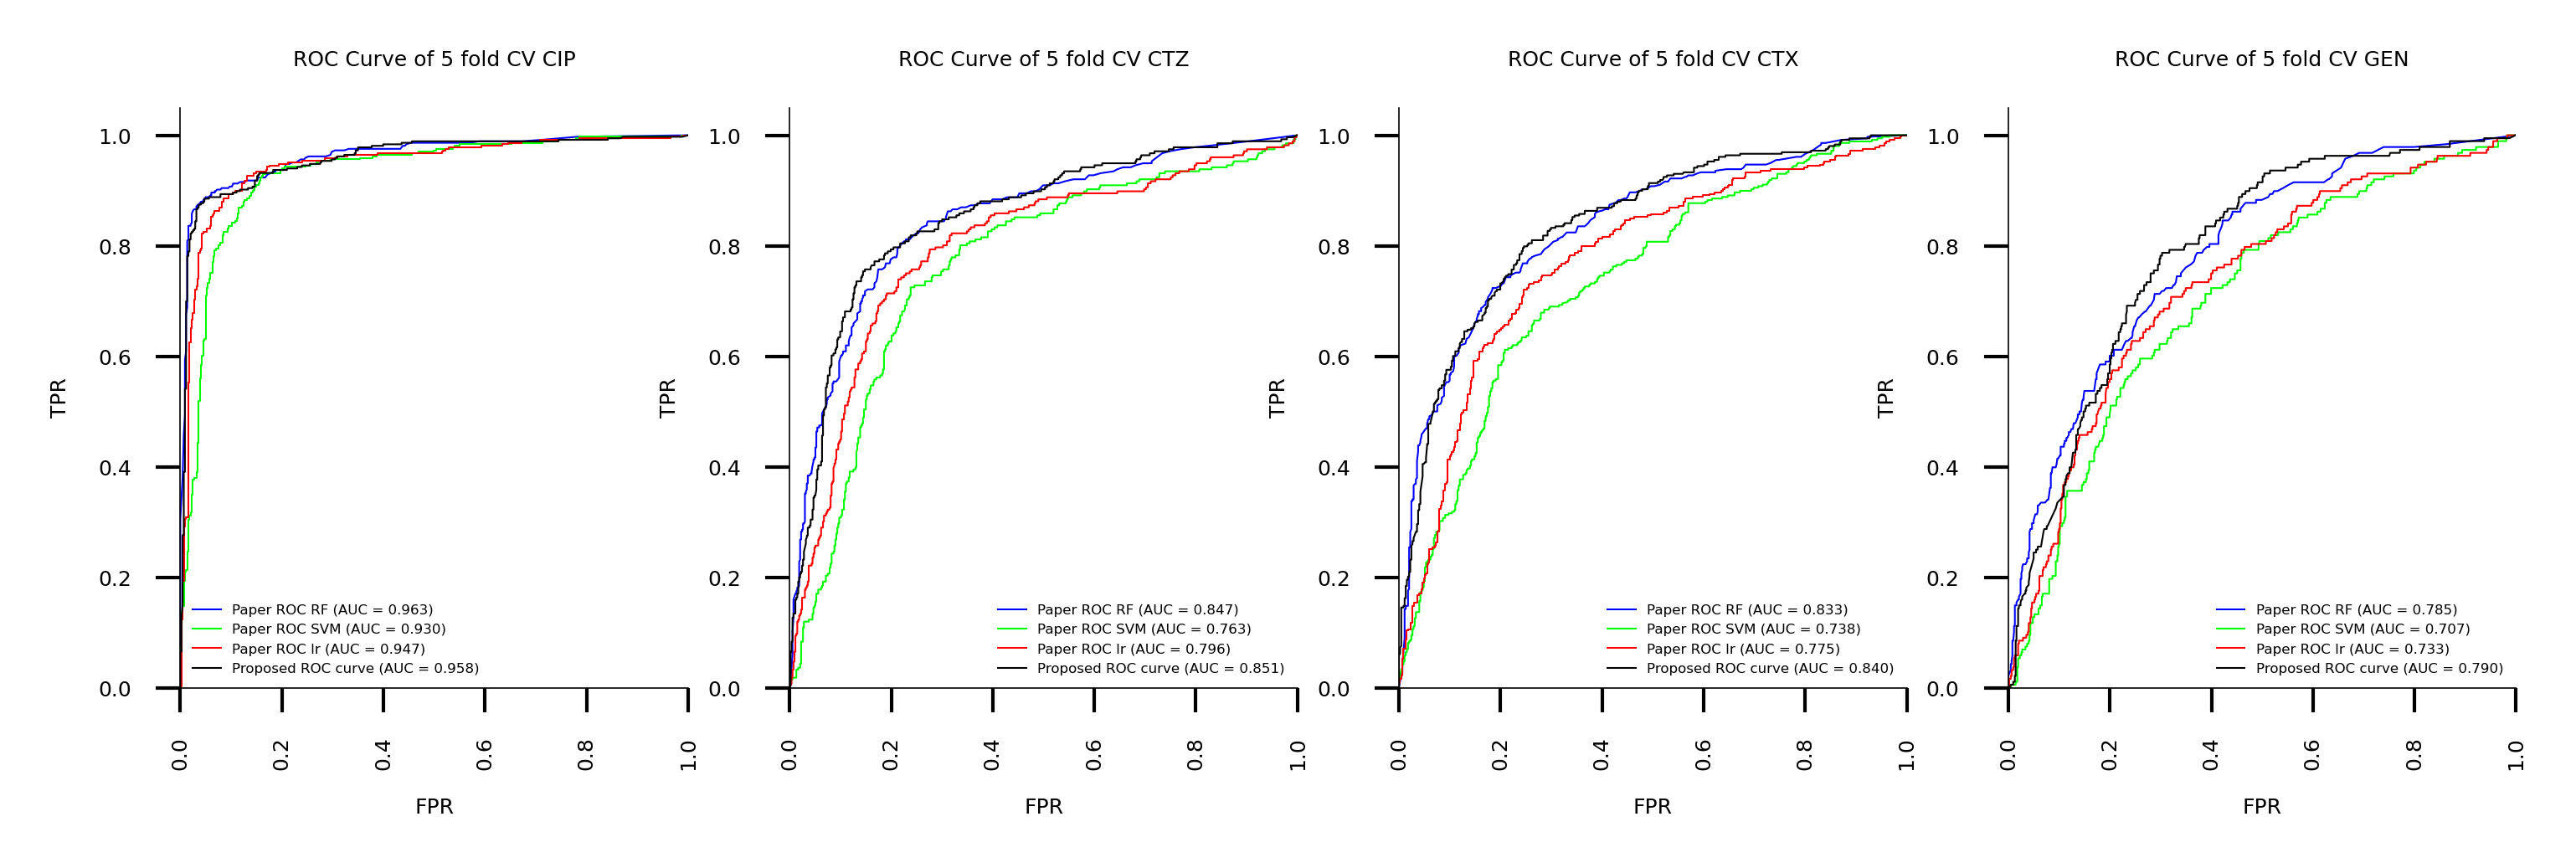

In [30]:
fig, ax = plt.subplots(1, 4, dpi = 600, figsize = (6, 1.5))

drug = "CIP"
ax[0] = plot_roc_drug_multi_model(drug, y_cv_true_cip, y_cip_label_rf, y_cip_label_svm, y_cip_label_lr, y_cip_oligo_rf, ax=ax[0])
ax[0] = utility_amr.custom_figure_axis(ax[0], fontsize=3)
ax[0].legend(fontsize=2, frameon=False)

drug = "CTZ"
ax[1] = plot_roc_drug_multi_model(drug, y_cv_true_ctz, y_ctz_label_rf, y_ctz_label_svm, y_ctz_label_lr, y_ctz_oligo_rf, ax=ax[1])
ax[1] = utility_amr.custom_figure_axis(ax[1], fontsize=3)
ax[1].legend(fontsize=2, frameon=False)

drug = "CTX"
ax[2] = plot_roc_drug_multi_model(drug, y_cv_true_ctx, y_ctx_label_rf, y_ctx_label_svm, y_ctx_label_lr, y_ctx_oligo_rf, ax=ax[2])
ax[2] = utility_amr.custom_figure_axis(ax[2], fontsize=3)
ax[2].legend(fontsize=2, frameon=False)

drug = "GEN"
ax[3] = plot_roc_drug_multi_model(drug, y_cv_true_gen, y_gen_label_rf, y_gen_label_svm, y_gen_label_lr, y_gen_oligo_rf, ax=ax[3])
ax[3] = utility_amr.custom_figure_axis(ax[3], fontsize=3)
ax[3].legend(fontsize=2, frameon=False)
# plt.tight_layout()

##### store all the metric in single dataframe

In [31]:
res = pd.DataFrame(columns = ["drug", "method", "accuracy", "precision", "recall"], index = list(range(0,16)))
res.loc[range(0,4), "drug"] = "CIP"
res.loc[range(4,8), "drug"] = "CTX"
res.loc[range(8,12), "drug"] = "CTZ"
res.loc[range(12,16), "drug"] = "GEN"
res.loc[range(0,4), "method"] = [ "paper lr", "paper svm", "paper rf", "proposed"]
res.loc[range(4,8), "method"] = [ "paper lr", "paper svm", "paper rf", "proposed"]
res.loc[range(8,12), "method"] = [ "paper lr", "paper svm", "paper rf", "proposed"]
res.loc[range(12,16), "method"] = [ "paper lr", "paper svm", "paper rf", "proposed"]


y_list = [y_cip_label_rf, y_cip_label_svm, y_cip_label_lr, y_cip_oligo_rf,
          y_ctx_label_rf, y_ctx_label_svm, y_ctx_label_lr, y_ctx_oligo_rf,
          y_ctz_label_rf, y_ctz_label_svm, y_ctz_label_lr, y_ctz_oligo_rf,
          y_gen_label_rf, y_gen_label_svm, y_gen_label_lr, y_gen_oligo_rf]


y_true = y_cv_true_cip
y_pred = [y_cip_label_lr, y_cip_label_svm, y_cip_label_rf, y_cip_oligo_rf]
res.loc[range(0,4), "accuracy"] =  [accuracy_score(y_true, np.round(y_pred[0])),  accuracy_score(y_true, np.round(y_pred[1])),   
                                    accuracy_score(y_true, np.round(y_pred[2])),  accuracy_score(y_true, np.round(y_pred[3]))]

res.loc[range(0,4), "precision"] =  [precision_score(y_true, np.round(y_pred[0])),  precision_score(y_true, np.round(y_pred[1])),   
                                    precision_score(y_true, np.round(y_pred[2])),  precision_score(y_true, np.round(y_pred[3]))]

res.loc[range(0,4), "recall"] =  [recall_score(y_true, np.round(y_pred[0])),  recall_score(y_true, np.round(y_pred[1])),   
                                    recall_score(y_true, np.round(y_pred[2])),  recall_score(y_true, np.round(y_pred[3]))]


res.loc[range(0,4), "f1"] =  [f1_score(y_true, np.round(y_pred[0])),  f1_score(y_true, np.round(y_pred[1])),   
                                    f1_score(y_true, np.round(y_pred[2])),  f1_score(y_true, np.round(y_pred[3]))]

res.loc[range(0,4), "mcc"] =  [matthews_corrcoef(y_true, np.round(y_pred[0])),  matthews_corrcoef(y_true, np.round(y_pred[1])),   
                                    matthews_corrcoef(y_true, np.round(y_pred[2])),  matthews_corrcoef(y_true, np.round(y_pred[3]))]


res.loc[range(0,4), "roc"] =  [roc_auc_score(y_true, y_pred[0]),  roc_auc_score(y_true, y_pred[1]),   
                                    roc_auc_score(y_true, y_pred[2]),  roc_auc_score(y_true, y_pred[3])]

y_true = y_cv_true_ctx
y_pred = [y_ctx_label_lr, y_ctx_label_svm, y_ctx_label_rf, y_ctx_oligo_rf]


res.loc[range(4, 8), "accuracy"] =  [accuracy_score(y_true, np.round(y_pred[0])),  accuracy_score(y_true, np.round(y_pred[1])),   
                                    accuracy_score(y_true, np.round(y_pred[2])),  accuracy_score(y_true, np.round(y_pred[3]))]

res.loc[range(4, 8), "precision"] =  [precision_score(y_true, np.round(y_pred[0])),  precision_score(y_true, np.round(y_pred[1])),   
                                    precision_score(y_true, np.round(y_pred[2])),  precision_score(y_true, np.round(y_pred[3]))]

res.loc[range(4, 8), "recall"] =  [recall_score(y_true, np.round(y_pred[0])),  recall_score(y_true, np.round(y_pred[1])),   
                                    recall_score(y_true, np.round(y_pred[2])),  recall_score(y_true, np.round(y_pred[3]))]


res.loc[range(4, 8), "f1"] =  [f1_score(y_true, np.round(y_pred[0])),  f1_score(y_true, np.round(y_pred[1])),   
                                    f1_score(y_true, np.round(y_pred[2])),  f1_score(y_true, np.round(y_pred[3]))]

res.loc[range(4, 8), "mcc"] =  [matthews_corrcoef(y_true, np.round(y_pred[0])),  matthews_corrcoef(y_true, np.round(y_pred[1])),   
                                    matthews_corrcoef(y_true, np.round(y_pred[2])),  matthews_corrcoef(y_true, np.round(y_pred[3]))]


res.loc[range(4, 8), "roc"] =  [roc_auc_score(y_true, y_pred[0]),  roc_auc_score(y_true, y_pred[1]),   
                                    roc_auc_score(y_true, y_pred[2]),  roc_auc_score(y_true, y_pred[3])]


y_true = y_cv_true_ctz
y_pred = [y_ctz_label_lr, y_ctz_label_svm, y_ctz_label_rf, y_ctz_oligo_rf]


res.loc[range(8, 12), "accuracy"] =  [accuracy_score(y_true, np.round(y_pred[0])),  accuracy_score(y_true, np.round(y_pred[1])),   
                                    accuracy_score(y_true, np.round(y_pred[2])),  accuracy_score(y_true, np.round(y_pred[3]))]

res.loc[range(8, 12), "precision"] =  [precision_score(y_true, np.round(y_pred[0])),  precision_score(y_true, np.round(y_pred[1])),   
                                    precision_score(y_true, np.round(y_pred[2])),  precision_score(y_true, np.round(y_pred[3]))]

res.loc[range(8, 12), "recall"] =  [recall_score(y_true, np.round(y_pred[0])),  recall_score(y_true, np.round(y_pred[1])),   
                                    recall_score(y_true, np.round(y_pred[2])),  recall_score(y_true, np.round(y_pred[3]))]


res.loc[range(8, 12), "f1"] =  [f1_score(y_true, np.round(y_pred[0])),  f1_score(y_true, np.round(y_pred[1])),   
                                    f1_score(y_true, np.round(y_pred[2])),  f1_score(y_true, np.round(y_pred[3]))]

res.loc[range(8, 12), "mcc"] =  [matthews_corrcoef(y_true, np.round(y_pred[0])),  matthews_corrcoef(y_true, np.round(y_pred[1])),   
                                    matthews_corrcoef(y_true, np.round(y_pred[2])),  matthews_corrcoef(y_true, np.round(y_pred[3]))]


res.loc[range(8, 12), "roc"] =  [roc_auc_score(y_true, y_pred[0]),  roc_auc_score(y_true, y_pred[1]),   
                                    roc_auc_score(y_true, y_pred[2]),  roc_auc_score(y_true, y_pred[3])]



y_true = y_cv_true_gen
y_pred = [y_gen_label_lr, y_gen_label_svm, y_gen_label_rf, y_gen_oligo_rf]


res.loc[range(12, 16), "accuracy"] =  [accuracy_score(y_true, np.round(y_pred[0])),  accuracy_score(y_true, np.round(y_pred[1])),   
                                    accuracy_score(y_true, np.round(y_pred[2])),  accuracy_score(y_true, np.round(y_pred[3]))]

res.loc[range(12, 16), "precision"] =  [precision_score(y_true, np.round(y_pred[0])),  precision_score(y_true, np.round(y_pred[1])),   
                                    precision_score(y_true, np.round(y_pred[2])),  precision_score(y_true, np.round(y_pred[3]))]

res.loc[range(12, 16), "recall"] =  [recall_score(y_true, np.round(y_pred[0])),  recall_score(y_true, np.round(y_pred[1])),   
                                    recall_score(y_true, np.round(y_pred[2])),  recall_score(y_true, np.round(y_pred[3]))]


res.loc[range(12, 16), "f1"] =  [f1_score(y_true, np.round(y_pred[0])),  f1_score(y_true, np.round(y_pred[1])),   
                                    f1_score(y_true, np.round(y_pred[2])),  f1_score(y_true, np.round(y_pred[3]))]

res.loc[range(12, 16), "mcc"] =  [matthews_corrcoef(y_true, np.round(y_pred[0])),  matthews_corrcoef(y_true, np.round(y_pred[1])),   
                                    matthews_corrcoef(y_true, np.round(y_pred[2])),  matthews_corrcoef(y_true, np.round(y_pred[3]))]


res.loc[range(12, 16), "roc"] =  [roc_auc_score(y_true, y_pred[0]),  roc_auc_score(y_true, y_pred[1]),   
                                    roc_auc_score(y_true, y_pred[2]),  roc_auc_score(y_true, y_pred[3])]



res


,drug,method,accuracy,precision,recall,f1,mcc,roc
0,CIP,paper lr,0.889988,0.863517,0.898907,0.880857,0.779294,0.946959
1,CIP,paper svm,0.875155,0.853333,0.874317,0.863698,0.748752,0.930195
2,CIP,paper rf,0.917182,0.923513,0.89071,0.906815,0.832772,0.963312
3,CIP,proposed,0.922126,0.93913,0.885246,0.911392,0.843210,0.958267
4,CTX,paper lr,0.735476,0.693548,0.72067,0.706849,0.466304,0.775322
5,CTX,paper svm,0.686032,0.63198,0.695531,0.662234,0.371669,0.738176
6,CTX,paper rf,0.766378,0.738028,0.731844,0.734923,0.526105,0.833372
7,CTX,proposed,0.770087,0.725131,0.773743,0.748649,0.538174,0.839708
8,CTZ,paper lr,0.773795,0.657627,0.702899,0.679510,0.505692,0.795929
9,CTZ,paper svm,0.742892,0.61039,0.681159,0.643836,0.445253,0.763120


In [32]:
res = res.apply(pd.to_numeric, errors='ignore')
res_rounded = res.round(3)

/tmp/ipykernel_2312112/1454771651.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  res = res.apply(pd.to_numeric, errors='ignore')


In [33]:
res_rounded

,drug,method,accuracy,precision,recall,f1,mcc,roc
0,CIP,paper lr,0.890,0.864,0.899,0.881,0.779,0.947
1,CIP,paper svm,0.875,0.853,0.874,0.864,0.749,0.930
2,CIP,paper rf,0.917,0.924,0.891,0.907,0.833,0.963
3,CIP,proposed,0.922,0.939,0.885,0.911,0.843,0.958
4,CTX,paper lr,0.735,0.694,0.721,0.707,0.466,0.775
5,CTX,paper svm,0.686,0.632,0.696,0.662,0.372,0.738
6,CTX,paper rf,0.766,0.738,0.732,0.735,0.526,0.833
7,CTX,proposed,0.770,0.725,0.774,0.749,0.538,0.840
8,CTZ,paper lr,0.774,0.658,0.703,0.680,0.506,0.796
9,CTZ,paper svm,0.743,0.610,0.681,0.644,0.445,0.763


In [34]:
# res_rounded.to_excel("res_rounded.xlsx", index=False)